## Experiment 1

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [74]:
d_ia = np.array([14.5, 67, 37.5, 32, 16.7])
d_ob = np.array([17.7, 7.6, 7.5, 9, 16.2])
alpha_d_ia = np.array([0.5]*len(d_ia))
alpha_d_ob = np.array([0.5]*len(d_ob))
delta_x = np.array([50.13, 9.70, 20.08, 19.68, 127.48])
alpha_delta_x = np.array([0.5]*len(delta_x))
f_A = 18
alpha_f_A = 0.5

In [75]:
d_oa = (d_ia*f_A)/(d_ia - f_A)
alpha_d_oa = np.sqrt((d_ia**4 * alpha_f_A**2 + f_A**4 * alpha_d_ia**2) / (d_ia - f_A)**4)

d_ib = delta_x - d_oa
alpha_d_ib = np.sqrt(alpha_delta_x**2 + alpha_d_oa**2)

alpha_M_a = np.sqrt()

In [76]:
x = 1 / d_ib
y = 1 / d_ob

alpha_x = alpha_d_ib / (d_ib ** 2)
alpha_y = alpha_d_ob / (d_ob ** 2)

alpha_combined = np.sqrt(alpha_x**2 + alpha_y**2)

# weights based on combined uncertainties
weights = 1 / (alpha_combined ** 2)

# calculate the numerator and denominator for b
numerator = np.sum(weights * (x + y))
denominator = np.sum(weights)

b = numerator / denominator

alpha_b = np.sqrt(1 / denominator)

print(alpha_x)
print(alpha_y)
print(f'alpha_y_i_equiv = {alpha_combined} ')

print(f"b = {b:5f} +/- {alpha_b:5f}")

[0.0010143  0.00477697 0.00928791 0.00604604 0.00098295]
[0.00159597 0.00865651 0.00888889 0.00617284 0.0019052 ]
alpha_y_i_equiv = [0.00189101 0.00988709 0.01285604 0.00864052 0.00214382] 
b = 0.064517 +/- 0.001378


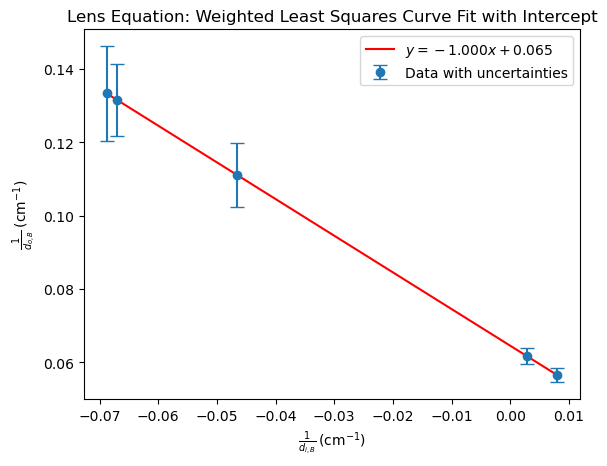

(-1.0001025082657482, 0.09002422699282871, 0.06451661868153646)

In [82]:
# define linear fit function
def linear_func_fixed_intercept(x, m):
    return m * x + b

# curve fit
popt, pcov = curve_fit(linear_func_fixed_intercept, x, y, sigma=alpha_combined, absolute_sigma=True)

# slope and uncertainty
m_fit = popt[0]
m_uncertainty = np.sqrt(pcov[0, 0])

# generate fit line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func_fixed_intercept(x_fit, m_fit)

# Plot
plt.errorbar(x, y, yerr=alpha_combined, fmt='o', label='Data with uncertainties', capsize=5)
plt.plot(x_fit, y_fit, label=f'$y = {m_fit:.3f}x + {b:.3f}$', color='red')
plt.xlabel(r'$\frac{1}{d_{i,B}} \, \left( \mathrm{cm}^{-1} \right)$')
plt.ylabel(r'$\frac{1}{d_{o,B}} \, \left( \mathrm{cm}^{-1} \right)$')
plt.title('Lens Equation: Weighted Least Squares Curve Fit with Intercept')
plt.legend()
plt.show()
(m_fit, m_uncertainty, b)

In [78]:
focal_length_from_intercept_weighted_fit = 1 / b

alpha_f =  alpha_b / (b ** 2)

print(f'Focal Length (from intercept): {focal_length_from_intercept_weighted_fit:.3f} +/- {alpha_f:.3f} cm')

Focal Length (from intercept): 15.500 +/- 0.331 cm


In [81]:
# Calculate reduced chi-squared
residuals = y - linear_func_fixed_intercept(x, m_fit)
chi_squared = np.sum((residuals / alpha_combined) ** 2)
degrees_of_freedom = len(x) - 2

reduced_chi_squared = chi_squared / degrees_of_freedom
print(reduced_chi_squared)
print(chi_squared)

3.890222634231927e-07
1.1670667902695782e-06
